In [125]:
tmp = pd.DataFrame({'a':[1,2], 'b':[4,5]}, index=['q', 'h'])

In [127]:
tmp.drop('b', axis=1)

,a
q,1
h,2


In [21]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import get_inp, parse_formula, mixed_atomic_weight
import numpy as np
import pandas as pd

In [73]:
inp['series'][0]['host']

[-485.837607,
 -485.845934,
 -485.8524581,
 -485.8573869,
 -485.8609047,
 -485.8631746,
 -485.8643527,
 -485.8645828,
 -485.8639909,
 -485.862687,
 -485.8607679,
 -485.8583245,
 -485.8554481,
 -485.852212,
 -485.8486786,
 -485.8449072,
 -485.8409477,
 -485.8368362,
 -485.8326032,
 -485.8282779,
 -485.8238847]

In [136]:
inp = get_inp('mg_vibration_TO.json')

In [137]:
pair = inp['series'][0]['normalize']['energies']
cluster = inp['series'][0]['clusters']['energies']

In [138]:
ens = dict(lattice=inp['series'][0]['lattice'], host=inp['series'][0]['host'])
# ens.update(pair)
ens.update(cluster)

In [141]:
pd.DataFrame(pair).to_csv('normalizer.csv', index=False)
pd.DataFrame(ens).to_csv('cluster.csv', index=False)

In [139]:
pd.DataFrame(ens).to_csv('energies.csv', index=False)

In [71]:
from ruamel.yaml import YAML
import sys

yaml = YAML()
yaml.indent(mapping=4, sequence=4, offset=2)
yaml.default_flow_style = None
yaml.width = 120

In [72]:
with open('input.yml', 'w') as f:
    yaml.dump(inp, f)

In [52]:
meta = inp['meta']
series = inp['series']
experiment = inp['experiment']


In [4]:
meta['host'] = 'Al'
meta

{'host': 'Al',
 'impurity': 'Mg',
 'prefix': '',
 'suffix': 'vib_TO',
 'description': 'PdRu solubility limit calculation with tetrahedron approximation',
 'structure': 'A1'}

In [5]:
def patch(r0):
    _1st = -0.081 + (-0.00365 * (r0 - 7.85) / 0.1)
    _2nd = 0
    _3body = 0
    _4body = 0
    
    return ((_1st, _2nd), _3body, _4body)

In [6]:
kkr = series[0]['energies']['triple'][1]

In [7]:
ys = uc.ry2eV(np.array(kkr['energy']) / 4)
mass = kkr['mass']
xs = uc.lc2ad(np.array(series[0]['lattice_c'], np.float64))
shift = uc.ry2eV(np.array(series[0]['host_en'], np.float64))

In [8]:
tmp = ClusterVibration(xs, ys, mass, energy_shift=shift)
tmp

c1: 2.460755,  c2: 2.460417,  lambda: 1.099920
r0: 3.149643,  x0: 0.031293
Gruneisen constant: 1.732178
Equilibrium lattice constant: 8.059557 a.u.
Bulk Modulus: 542.111353 Kbar
Debye temperature: 339.739886 K

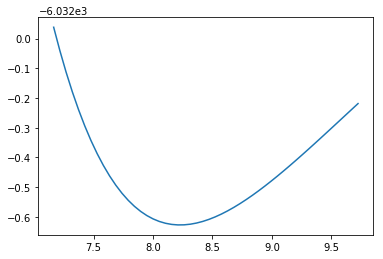

In [9]:
xs = np.linspace(2.8, 3.8, 50)
ys = [tmp(800, r) for r in xs]


plt.plot(uc.ad2lc(xs), ys)


In [10]:
tmp(800, min_x=True)

(-6032.627841499645, 8.227533381615398)

In [11]:
sample = Sample(
    coord_num=[
        12,
        6,
        24,
        12,
        24,
        8,
        48,
        6,
        12,  # 9th-a
        24,  # 9th-b
        4,
        24,
        24,
        48,  # 13th-a
        24,  # 13th-b
        48,
        12,
        24,  # 16th-a
        24,  # 16th-b
        24,  # 17th-a
        6,  # 17th-b
        48,  # 18th-a
        24,  # 18th-b
        24,
        48  # 20th
    ],
    patch=patch,
    **series[0])

TypeError: __init__() got an unexpected keyword argument 'skip'

In [16]:
sample(800, 0.1)

((-0.0432915526022456, -0.002337195315703866),
 0.00681263147998834,
 0.0022040259500499815)

In [17]:
tetra = Tetrahedron.from_samples(meta, sample, experiment=experiment)

In [18]:
for T, c, c_, e_int in tetra():
    print('1: %s' % (e_int[0][0]))
    print('2: %s' % (e_int[0][1]))
    print('3: %s' % (e_int[1]))
    print('4: %s' % (e_int[2]))
    print('T=%s' % T, 'Concentration=%s' % c, 'Counts=%s' % c_)

1: -0.031123175921043772
2: -0.00024214000404754188
3: 0.00797660259559052
4: 0.0025379573853570037
T=300.0 Concentration=0.0160198079690677 Counts=102
1: -0.03204698422684604
2: -0.0003791013114096131
3: 0.007882255318691023
4: 0.002504556832718663
T=338.8888888888889 Concentration=0.024319988122706013 Counts=110
1: -0.03303911614313301
2: -0.0005151265195308952
3: 0.007779543753713369
4: 0.0024679778871359304
T=377.77777777777777 Concentration=0.03390395250703523 Counts=115
1: -0.034085398625308835
2: -0.0006529409693030175
3: 0.007670865295949625
4: 0.0024294242211908568
T=416.66666666666663 Concentration=0.04438119823906934 Counts=121
1: -0.03517277634775434
2: -0.0007946004261611961
3: 0.007558312885521445
4: 0.0023899728766991757
T=455.55555555555554 Concentration=0.055399092992154945 Counts=127
1: -0.036290310520372765
2: -0.0009415339445695281
3: 0.007443605958542321
4: 0.0023505182689405046
T=494.44444444444446 Concentration=0.06668172506320318 Counts=132
1: -0.037430089942005

T=900.0 Concentration=0.1322374574878373 Counts=214